In [1]:
try:
    import evolvepy
except:
    import sys
    sys.path.append("..\src")
import evolvepy

import numpy as np
from matplotlib import pyplot as plt

In [2]:
def fitness_function(individuals):
    individual = individuals.astype(np.float32)[0]

    score = 0

    if individual < 500:
        score = individual
    elif individual < 1000:
        score = 1000 - individual
    elif individual < 2000:
        score = individual - 1000
    else:
        score = 3000 - individual

    return score


In [3]:
from evolvepy.evaluator import FunctionEvaluator

evaluator = FunctionEvaluator(fitness_function, mode=FunctionEvaluator.PYTHON)

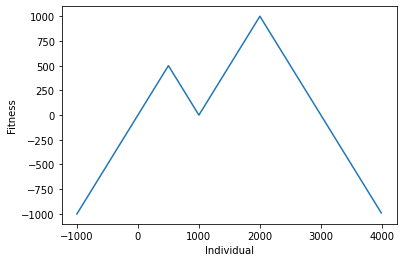

In [41]:
population = np.arange(-1000,4000,10)

fitness = evaluator(population)

plt.plot(population, fitness)
plt.xlabel("Individual")
plt.ylabel("Fitness")
plt.show()

In [35]:
from evolvepy.generator import Generator, CombineLayer
from evolvepy.generator.mutation import NumericMutationLayer, sum_mutation
from evolvepy.generator.crossover import one_point
from evolvepy.generator.selection import tournament

layers = [CombineLayer(tournament, one_point), NumericMutationLayer(sum_mutation, 1.0, 0.0, (-10.0, 10.0))]

generator = Generator(1, layers, (-1000.0, 4000.0))

In [36]:
generator.generate(5)

array([([3581.5288],), ([ 251.1991],), ([3530.4712],), ([1706.3438],),
       ([ 643.4531],)], dtype=[('chr0', '<f4', (1,))])

In [37]:
from evolvepy import Evolver

evolver = Evolver(generator, evaluator, 100)

In [38]:
hist, last_population = evolver.evolve(200) 

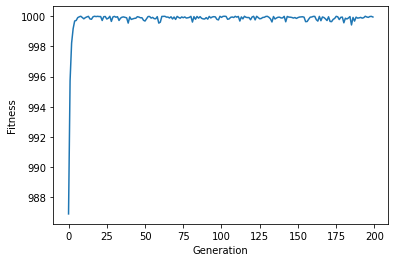

In [40]:
plt.plot(hist.max(axis=1))
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.show()